<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/semana8/regresiones_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Ejercicio 1</h3>
<p>Costo en la industria de manufactura.</p>

<ul>
<li>Divide los datos del costo de manufactura. Utiliza la duncion train_test_split</li>
<ul>

In [205]:
#Importamos la base de datos y las librerias que vamos a utilizar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')

#Revisamos la correlacion entre variables porque nos da un indice de linearidad y 
#de que tan funcional sera usar regression lineal con los datos
print('Correlacion entre variables')
print(df.corr())

#Separamos la variable objetivo de la caracteristica que usaremos para predecir
x = df['Number of Units']
y = df['Manufacturing Cost']

#El modelo de regresion lineal de Scikit-Learn's espera un input de 2D y de momento nuestros datos
#tienen una forma de 1D. Por lo que tenemos que reformar nuestros datos.
print('Forma de datos antes')
print('X: ',x.values.shape,'Y: ',y.values.shape)

#reformar
X = x.values.reshape(-1, 1)
Y = y.values.reshape(-1, 1)

print('Forma de datos despues')
print('X: ',X.shape,'Y_train: ',Y.shape)


#Por default obtenemos un 25% de datos reservados para testing
#Dado que el proceso de seleccion de datos es random, para evitar diferencias cada vez que 
#ejecutemos el algoritmo. Utilizaremos una constante SEED = 42
SEED = 42
(X_train, X_test, y_train, y_test) = train_test_split(X, Y,random_state=SEED)


Correlacion entre variables
                    Number of Units  Manufacturing Cost
Number of Units            1.000000           -0.760905
Manufacturing Cost        -0.760905            1.000000
Forma de datos antes
X:  (1000,) Y:  (1000,)
Forma de datos despues
X:  (1000, 1) Y_train:  (1000, 1)


<ul>
<li>Regression Lineal</li>
<ul>

In [206]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Entrenamos nuestro modelo en los datos de entrenamiento
regressor.fit(X_train, y_train)

print('Interseccion: ',regressor.intercept_)
print('Coeficiente: ',regressor.coef_)

#Revisemos las predicciones en los datos de prueba
y_pred = regressor.predict(X_test)

#Comparamos las predicciones con los valores reales
df_preds = pd.DataFrame({'Real': y_test.squeeze(), 'Prediccion': y_pred.squeeze()})
print(df_preds)



Interseccion:  [67.88519414]
Coeficiente:  [[-6.22507903]]
          Real  Prediccion
0    38.634483   39.755998
1    33.233497   34.987583
2    34.550609   34.937744
3    34.982985   36.569338
4    43.090662   41.850114
..         ...         ...
245  57.942993   50.041007
246  37.715435   41.573461
247  46.461065   51.676315
248  50.402065   51.241571
249  40.800063   44.616595

[250 rows x 2 columns]


<p>Errores y R^2</p>

In [207]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 4.73
Mean squared error: 39.90
Root mean squared error: 6.32
R^2: 0.58


<p>Graficamos los resultados</p>

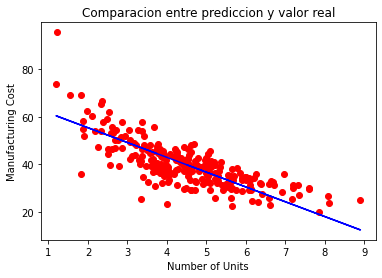

In [208]:
import matplotlib.pyplot as plot

plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_pred, color = 'blue')
plot.title('Comparacion entre prediccion y valor real')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

<h3>Regresion Polinomial</h3>

In [209]:
from sklearn.preprocessing import PolynomialFeatures


#Ejemplo con grado 2
poly_reg=PolynomialFeatures(degree=2)

#Entrenamos el Modelo
X_poly=poly_reg.fit_transform(X_train)


poly_reg.fit(X_poly,y_train)

poly_reg_model = LinearRegression()

poly_reg_model.fit(X_poly, y_train)

#Creamos la base polinomial de los datos de prueba
poly_test = poly_reg.fit_transform(X_test)

y_poly_pred = poly_reg_model.predict(poly_test)


In [210]:
mae = mean_absolute_error(y_test, y_poly_pred)
mse = mean_squared_error(y_test, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_poly_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 4.51
Mean squared error: 35.17
Root mean squared error: 5.93
R^2: 0.63


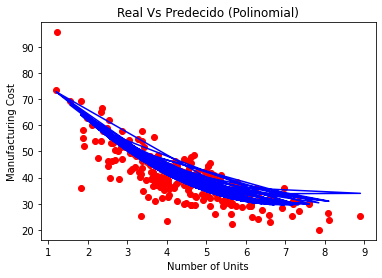

In [211]:
plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_poly_pred, color = 'blue')
plot.title('Real Vs Predecido (Polinomial)')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

<h3>Ridge and Lasso Regression</h3>

In [212]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Modelo Ridge Regression 
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)
y_pred = ridgeReg.predict(X_test)

print("\nModelo Ridge ............................................\n")
print('Coeficiente de la ecuacion: {}'.format(ridgeReg.coef_))
print('Interseccion de la ecuacion: {}'.format(ridgeReg.intercept_))
print("\n")


print("El valor de entrenamiento para ridge es {}".format(train_score_ridge))
print("El valor de prueba para ridge es {}".format(test_score_ridge))


Modelo Ridge ............................................

Coeficiente de la ecuacion: [[-6.17811641]]
Interseccion de la ecuacion: [67.67536193]


El valor de entrenamiento para ridge es 0.5773917472599517
El valor de prueba para ridge es 0.5832526783114598


In [213]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 4.72
Mean squared error: 39.77
Root mean squared error: 6.31
R^2: 0.58


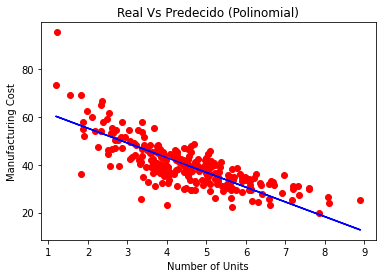

In [214]:
plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_pred, color = 'blue')
plot.title('Real Vs Predecido (Polinomial)')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

In [215]:
#Lasso regression model
print("\nModelo Lasso............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)
y_pred = lasso.predict(X_test)

print("\nModelo Ridge ............................................\n")
print('Coeficiente de la ecuacion: {}'.format(lasso.coef_))
print('Interseccion de la ecuacion: {}'.format(lasso.intercept_))
print("\n")

print("El valor de entrenamiento para Lasso es  {}".format(train_score_ls))
print("El valor de prueba para Lasso es  {}".format(test_score_ls))


Modelo Lasso............................................


Modelo Ridge ............................................

Coeficiente de la ecuacion: [-0.5239936]
Interseccion de la ecuacion: [42.41235616]


El valor de entrenamiento para Lasso es  0.09311771941960012
El valor de prueba para Lasso es  0.10755887340772496


In [216]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 6.78
Mean squared error: 85.18
Root mean squared error: 9.23
R^2: 0.11


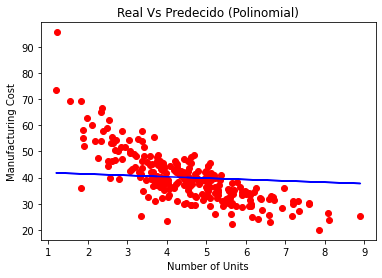

In [217]:
plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_pred, color = 'blue')
plot.title('Real Vs Predecido (Polinomial)')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

<h3>Concluisiones:</h3>
<p>Utilizamos 25% para los datos de prueba<p>
<p>El modelo que conviene usar para esta base de datos es una regresion polinomial de grado 2. Todas las medidas de error se ven reducidas con este metodo y la R^2 es mas cercana a 1.</p>
<p>Ademas los metodos de Ridge y Lasso no son necesarios en este caso ya que tenemos suficientes instancias para entrenar a los modelos.</p>